In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
tf.get_logger().setLevel('FATAL')

In [7]:
train = "/mnt/d/DUMP/Notebook/BoneBroke/xray_analytics_cnn/data/train"
val = "/mnt/d/DUMP/Notebook/BoneBroke/xray_analytics_cnn/data/val"

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
#Preprocessing

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(train, image_size = (256, 256), labels="inferred", label_mode="binary")
train_data = train_data.map(lambda x, y: (x/255 ,y))
train_size = int(len(train_data))
train_data_final = train_data.take(train_size)
print(train_size)

Found 8863 files belonging to 2 classes.
277


In [10]:
val_data = tf.keras.utils.image_dataset_from_directory(val, image_size = (256, 256), labels="inferred", label_mode="binary")
val_data = val_data.map(lambda x, y: (x/255 ,y))
val_data_final = val_data.take(len(val_data))

Found 600 files belonging to 2 classes.


In [11]:
#The Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1032256)           0         
                                                                 
 dense (Dense)               (None, 256)               264257792 
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 264,258,497
Trainable params: 264,258,497
Non-trainable params: 0
_________________________________________________________________


In [14]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_data_final, epochs=5, validation_data=val_data_final, callbacks=[tensorboard_callback])

Epoch 1/5


2023-09-20 23:06:20.013430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-20 23:06:20.074234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-20 23:06:20.074287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17788 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


277/277 [==============================] - ETA: 0s - loss: 1.7989 - accuracy: 0.6929

2023-09-20 23:07:16.630186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-20 23:07:16.653117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-20 23:07:16.653189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17788 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


277/277 [==============================] - 61s 205ms/step - loss: 1.7989 - accuracy: 0.6929 - val_loss: 0.8494 - val_accuracy: 0.6267
Epoch 2/5
277/277 [==============================] - 18s 66ms/step - loss: 0.3236 - accuracy: 0.8646 - val_loss: 0.6678 - val_accuracy: 0.6667
Epoch 3/5
277/277 [==============================] - 18s 65ms/step - loss: 0.1710 - accuracy: 0.9416 - val_loss: 0.8000 - val_accuracy: 0.6483
Epoch 4/5
277/277 [==============================] - 18s 65ms/step - loss: 0.0724 - accuracy: 0.9823 - val_loss: 0.8828 - val_accuracy: 0.6767
Epoch 5/5
277/277 [==============================] - 18s 65ms/step - loss: 0.0298 - accuracy: 0.9961 - val_loss: 1.1068 - val_accuracy: 0.6550


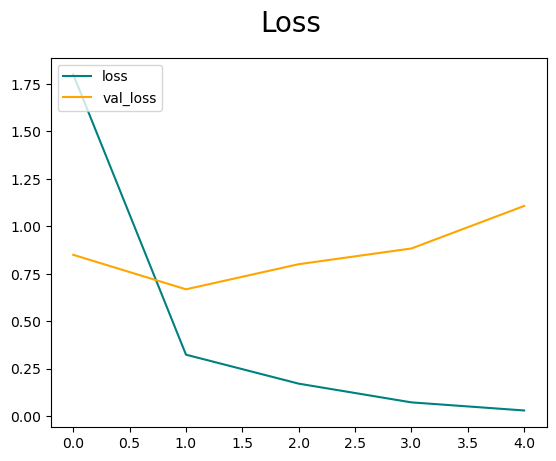

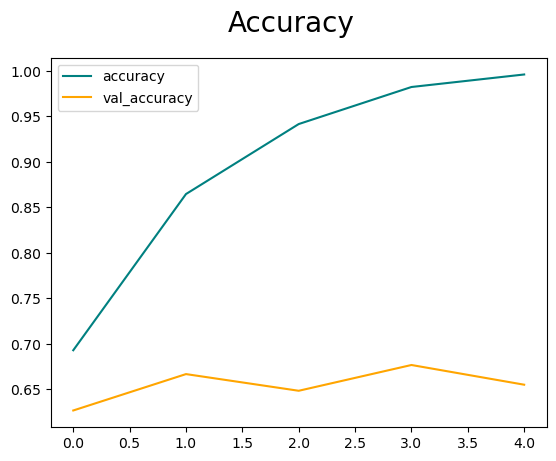

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('models/imageclassifier.h5')